In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [41]:
X_train = pd.read_csv('files/x_train.csv', sep=';').drop(['doReturnOnLowerLevels'], axis=1)
y_train = pd.read_csv('files/y_train.csv', sep=';', header=None)

In [42]:
X_train.columns

Index(['maxPlayerLevel', 'numberOfAttemptedLevels',
       'attemptsOnTheHighestLevel', 'totalNumOfAttempts',
       'averageNumOfTurnsPerCompletedLevel', 'numberOfBoostersUsed',
       'fractionOfUsefullBoosters', 'totalScore', 'totalBonusScore',
       'totalStarsCount', 'numberOfDaysActuallyPlayed'],
      dtype='object')

In [130]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=8, whiten=True))

In [131]:
X_train_trans = pipe.fit_transform(X_train)

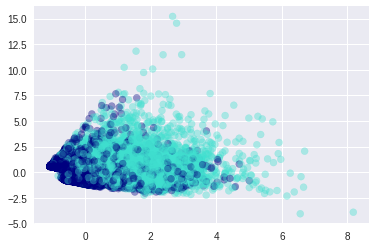

In [132]:
colors = y_train[0].map(lambda x: 'navy' if x == 0 else 'turquoise')
plt.scatter(X_train_trans[:, 0], X_train_trans[:, 1], color=colors, alpha=.39)

In [129]:
pca = PCA(n_components=8).fit(X_train)
X_pca = pca.transform(X_train)
print(sum(pca.explained_variance_ratio_))

1.0


In [ ]:
{'max_depth': 0, 'x_learning_rate': 0.041014908132302894, 'x_min_child': 9.0, 'x_n_estimators': 8558, 'x_subsample': 0.7050404843661073}
